**Sistema de recomendación de películas**

Jorge Fabián Hernández Torres
NUA:427178

In [2]:
from google.colab import files
uploaded = files.upload()

Saving u.data.csv to u.data.csv


Carga de datos

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("u.data.csv", sep="\t", header = None)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df.shape

(100000, 4)

In [8]:
df.columns = ["UserID","ItemID","Rating","TimeStamp"]

In [9]:
df.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Análisis exploratorio de los datos

In [10]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

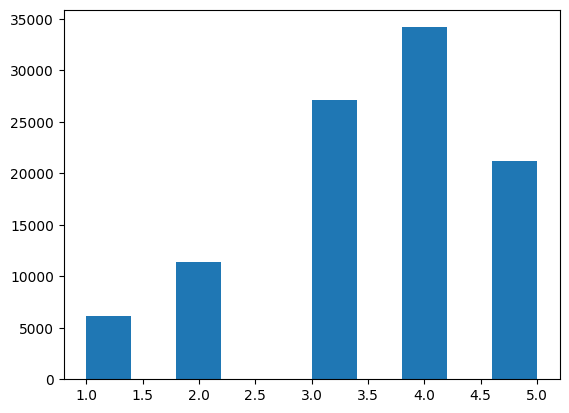

In [11]:
plt.hist(df.Rating)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <BarContainer object of 10 artists>)

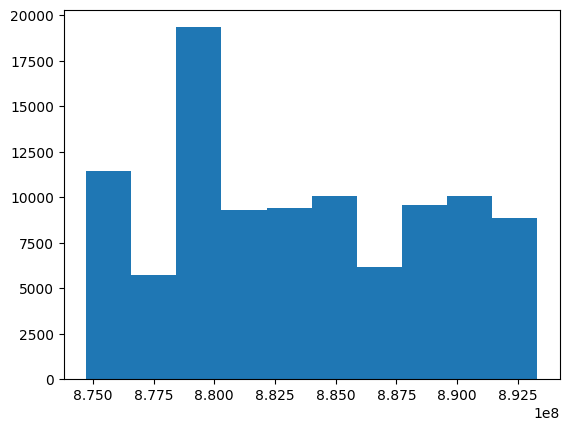

In [12]:
plt.hist(df.TimeStamp)

In [13]:
df.groupby(["Rating"])["UserID"].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

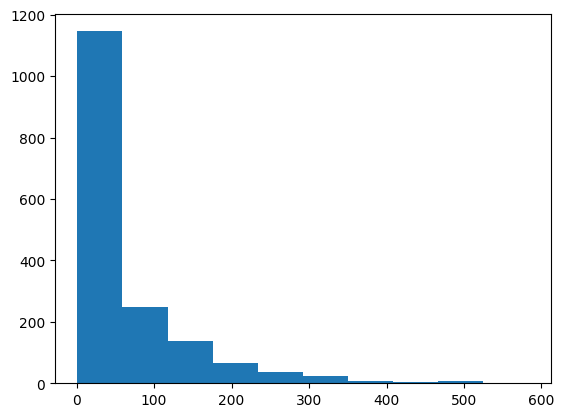

In [14]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count())

Representación en forma matricial

In [15]:
import numpy as np

In [16]:
n_users = df.UserID.unique().shape[0]
n_users

943

In [17]:
n_items = df.ItemID.unique().shape[0]
n_items

1682

In [18]:
ratings = np.zeros((n_users, n_items))

In [19]:
for row in df.itertuples():
  ratings[row[1]-1, row[2]-1] = row[3]

In [20]:
type(ratings)

numpy.ndarray

In [21]:
ratings.shape

(943, 1682)

In [22]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [23]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}%".format(sparsity))

Coeficiente de sparseidad: 6.30%


Conjuntos de entrenamiento y validación

In [24]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state = 42)

In [27]:
ratings_train.shape

(660, 1682)

In [28]:
ratings_test.shape

(283, 1682)

Filtro colaborativo basado en usuarios

In [29]:
import numpy as np
import sklearn 

In [30]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [31]:
type(sim_matrix)

numpy.ndarray

In [32]:
sim_matrix.shape

(660, 660)

In [33]:
sim_matrix

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [34]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

In [35]:
users_predictions 

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [36]:
from sklearn.metrics import mean_squared_error

In [133]:
def get_mse(preds, actuals):
  if preds.shape[0] != actuals.shape[0]:
    actuals = actuals.T
  preds = preds[actuals.nonzero()].flatten()
  actuals = actuals[actuals.nonzero()].flatten()
  return mean_squared_error(preds, actuals)

In [38]:
get_mse(users_predictions, ratings_train)

7.878218313143215

In [39]:
get_mse(users_predictions, ratings_test)

8.745164067978985

In [40]:
from sklearn.neighbors import NearestNeighbors

In [92]:
k = 6

In [93]:
neighbors = NearestNeighbors(n_neighbors=k, metric = 'cosine')

In [94]:
neighbors.fit(ratings_train)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [95]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

In [96]:
top_k_distances.shape

(660, 6)

In [97]:
top_k_distances[0]

array([0.        , 0.49780748, 0.55784838, 0.56965585, 0.57163621,
       0.57520588])

In [98]:
top_k_users.shape

(660, 6)

In [99]:
top_k_users[0]

array([  0, 211,  16, 185, 101, 155])

In [100]:
users_predics_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):
  users_predics_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T.sum(axis=0))]).T

In [101]:
users_predics_k.shape

(660, 1682)

In [102]:
users_predics_k

array([[0.82997687, 0.82997687, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.86436504, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.99694   , 2.79543328, 2.02100213, ..., 0.        , 0.        ,
        0.        ],
       [1.54095621, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [103]:
get_mse(users_predics_k, ratings_train)

4.305247677720045

In [104]:
get_mse(users_predics_k, ratings_test)

8.846527997745552

Filtro colaborativo basado en Items

In [105]:
n_movies = ratings_train.shape[1]
n_movies

1682

In [106]:
neighbors = NearestNeighbors(n_neighbors=n_movies, metric = 'cosine')

In [107]:
neighbors.fit(ratings_train.T)

NearestNeighbors(metric='cosine', n_neighbors=1682)

In [113]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [114]:
top_k_distances.shape

(1682, 1682)

In [115]:
top_k_items.shape

(1682, 1682)

In [116]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

In [117]:
item_preds.shape

(660, 1682)

In [118]:
item_preds

array([[5.26828520e-17, 1.81491881e-01, 1.84975068e-01, ...,
        3.53151011e-01, 3.61714398e-01, 3.61072723e-01],
       [1.51443061e-17, 2.76845163e-02, 2.75479698e-02, ...,
        4.81569560e-02, 4.93246906e-02, 4.92371895e-02],
       [1.11971199e-17, 2.56853867e-02, 2.68507499e-02, ...,
        4.45897741e-02, 4.56710098e-02, 4.55899903e-02],
       ...,
       [1.03915717e-17, 6.34395655e-02, 6.23832360e-02, ...,
        1.02259215e-01, 1.04738849e-01, 1.04553044e-01],
       [4.14857320e-17, 1.67722238e-01, 1.68514946e-01, ...,
        3.23424495e-01, 3.31267058e-01, 3.30679396e-01],
       [1.91720470e-17, 2.52640159e-02, 2.61251908e-02, ...,
        6.24256837e-02, 6.39394137e-02, 6.38259864e-02]])

In [119]:
get_mse(item_preds, ratings_train)

11.460962134170675

In [121]:
get_mse(item_preds,ratings_test)

12.127257997874693

Filtrado colaborativo basado en KNN

In [123]:
k = 30
neighbors = NearestNeighbors(n_neighbors=k, metric='cosine')
neighbors.fit(ratings_train.T)
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance = True)

In [124]:
top_k_distances.shape

(1682, 30)

In [125]:
top_k_items[0]

array([  0,  49, 180, 120, 116, 404,   6, 221,  99, 173, 150, 236,  27,
       171, 117, 256, 203,  78, 741,  94,  97,  68, 209, 124,  81,  24,
       167, 172, 227,  14])

In [126]:
top_k_distances[0]

array([0.        , 0.27629809, 0.30113328, 0.30472713, 0.3403217 ,
       0.34726332, 0.35536283, 0.35721264, 0.36136105, 0.36866657,
       0.37329885, 0.38428119, 0.39574721, 0.39737686, 0.40014911,
       0.40072802, 0.40161383, 0.40352935, 0.40451002, 0.41645588,
       0.42143241, 0.42475747, 0.42654625, 0.42764277, 0.42852725,
       0.43039718, 0.430995  , 0.43390098, 0.4349473 , 0.4355882 ])

In [129]:
preds = np.zeros(ratings_train.T.shape)
for i in range(ratings_train.T.shape[0]):
  preds[i,:]=top_k_distances[i].dot(ratings_train.T[top_k_items][i])/np.array([np.abs(top_k_distances[i]).sum(axis=0)]).T


In [134]:
get_mse(preds, ratings_train)

3.741306021148668